In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [51]:
df = pd.read_csv('../data/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [52]:
df.drop(columns=['ID'], inplace=True)

df['EDUCATION'] = df['EDUCATION'].replace({1: 'Postgraduate', 2: 'Graduate', 3: 'High School', 4: 'Others'})
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'Married', 2: 'Single', 3: 'Others'})
df['SEX'] = df['SEX'].replace({1: 'Male', 2: 'Female'})

df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,Female,Graduate,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,Graduate,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,Graduate,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,Graduate,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,Graduate,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


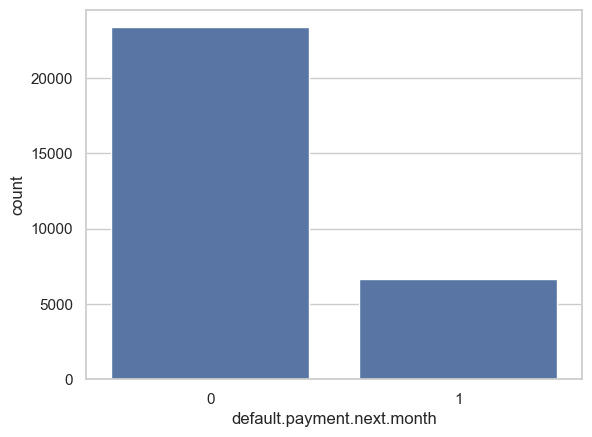

In [53]:
#plot count by default
sns.countplot(x="default.payment.next.month", data=df)
plt.show()

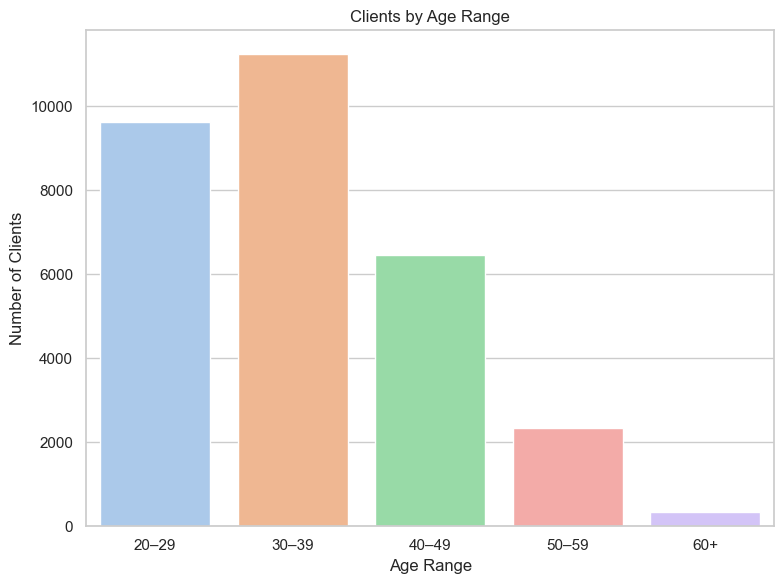

In [54]:
#creating age range and categorizing
bins = [20, 30, 40, 50, 60, 100]  
labels = ['20–29', '30–39', '40–49', '50–59', '60+']  

df['AGE_RANGE'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
df['AGE_RANGE'].value_counts().sort_index()


#plotting age range
sns.set_theme(style="whitegrid")

age_counts = df['AGE_RANGE'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, hue=age_counts.index, palette="pastel", legend=False)

plt.title("Clients by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Number of Clients")

plt.tight_layout()
plt.show()

<Axes: xlabel='SEX'>

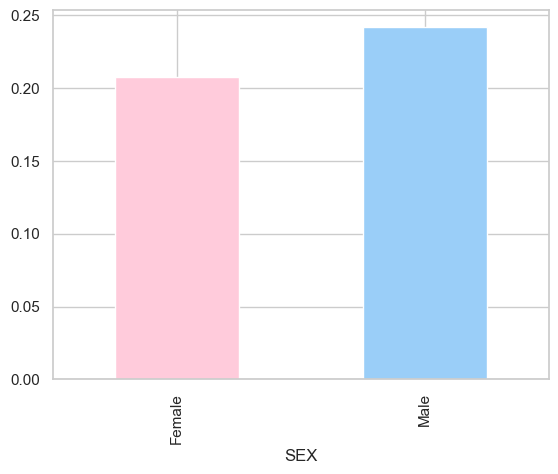

In [55]:
#default per sex
default_per_sex = df.groupby('SEX')['default.payment.next.month'].mean()
default_per_sex.plot(kind='bar', color=['#ffcbdb', '#9acef8'])

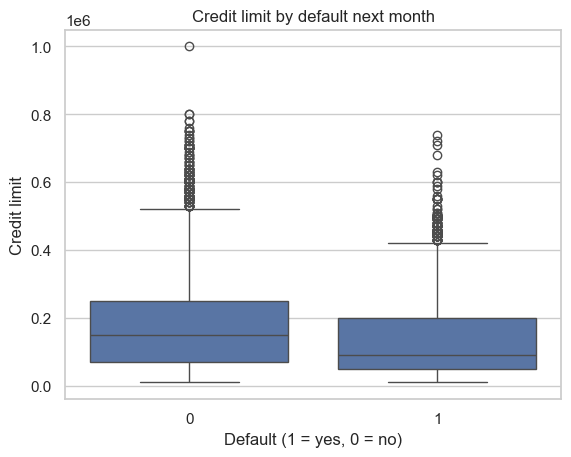

In [56]:
#plot default x limit bal
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=df)
plt.title('Credit limit by default next month')
plt.xlabel('Default (1 = yes, 0 = no)')
plt.ylabel('Credit limit')
plt.show()